In [1]:
#Library
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import lightgbm as lgb
from lightgbm import LGBMRegressor, LGBMClassifier, log_evaluation, early_stopping
from catboost import CatBoostRegressor, CatBoostClassifier
from xgboost import XGBRegressor, XGBClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold, GroupKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor,DecisionTreeClassifier
from sklearn.svm import SVR, SVC
from sklearn.ensemble import AdaBoostRegressor,AdaBoostClassifier, VotingClassifier, ExtraTreesClassifier, HistGradientBoostingClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neural_network import MLPRegressor, MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
import optuna

from sklearn.ensemble import VotingClassifier

In [2]:
appledf=pd.read_csv("/kaggle/input/apple-quality/apple_quality.csv")
appledf

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...,...
3996,3996.0,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,3997.0,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,3998.0,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good
3999,3999.0,0.278540,-1.715505,0.121217,-1.154075,1.266677,-0.776571,1.599796456,good


In [3]:
appledf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [4]:
appledf.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


In [5]:

X=appledf[:-1].drop(["Quality","A_id"],axis=1)
X.Acidity=X.Acidity.astype(float)
y=appledf[:-1]["Quality"]

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden">EDA
    
<span style="color: #FF360B;">

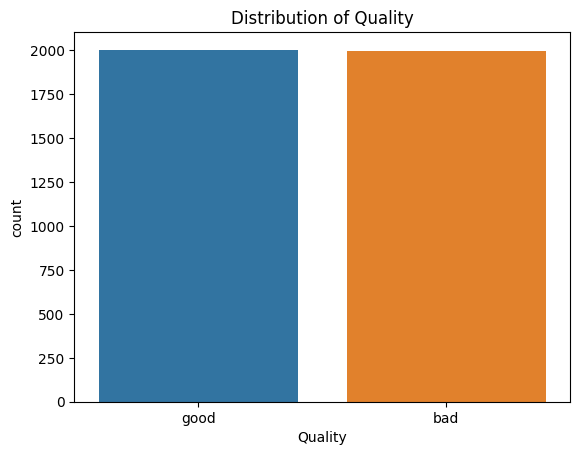

In [6]:
# Distribution of the target variable 'Quality'
sns.countplot(x='Quality', data=appledf)
plt.title('Distribution of Quality')
plt.show()

<Axes: >

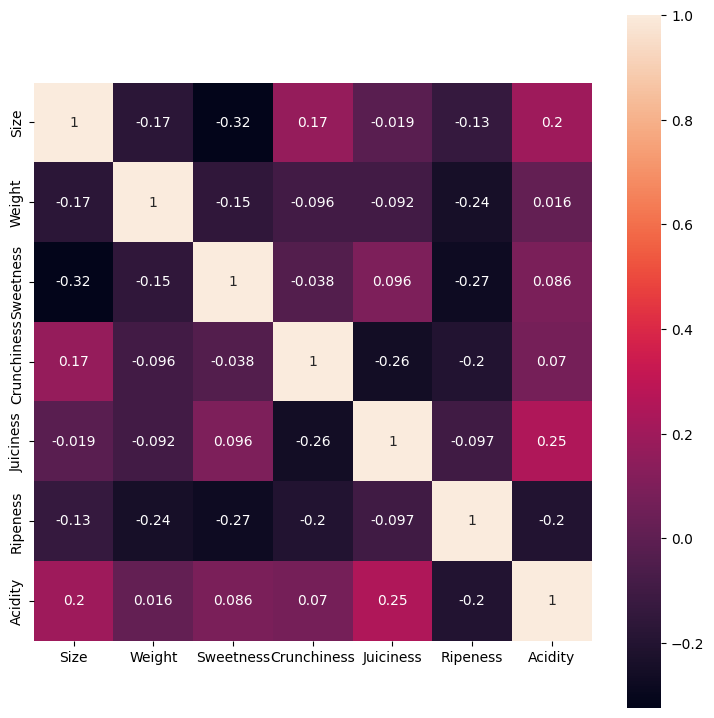

In [7]:
matrix = X.corr()
f, ax = plt.subplots(figsize=(9, 9))
sns.heatmap(matrix, vmax=1.0, square=True, annot=True)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


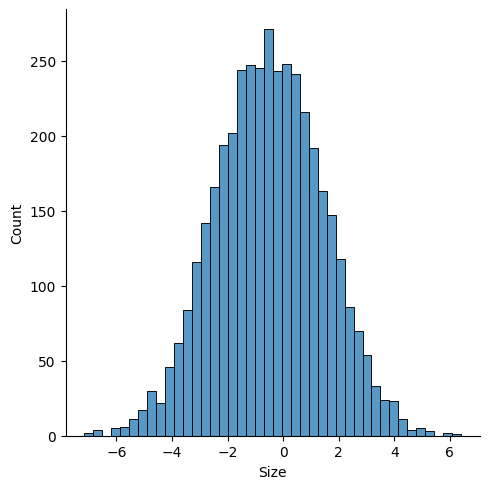

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


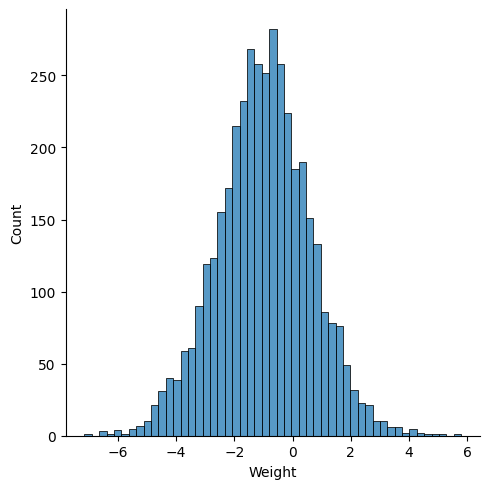

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


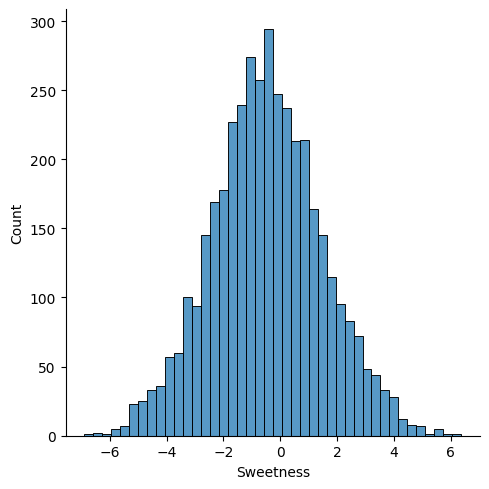

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


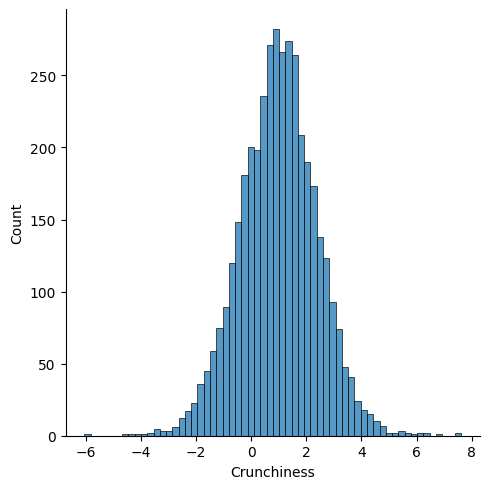

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


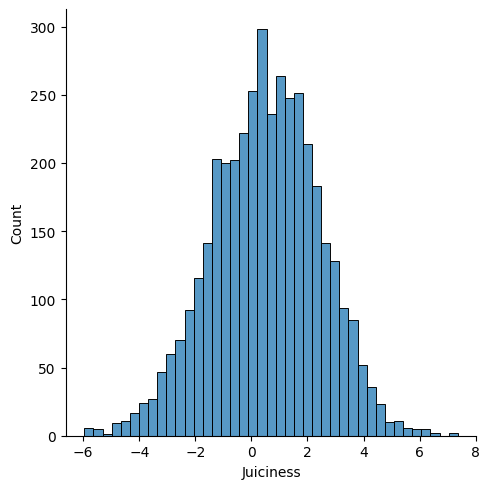

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


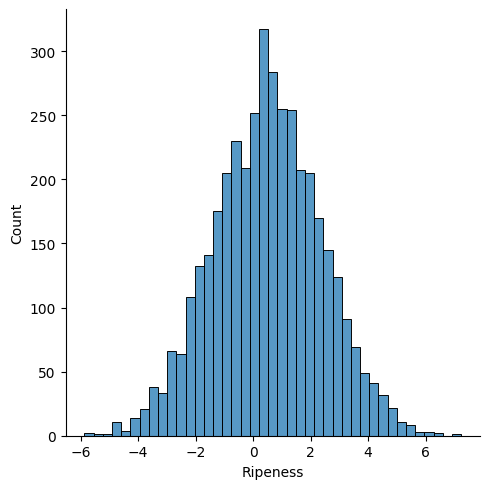

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


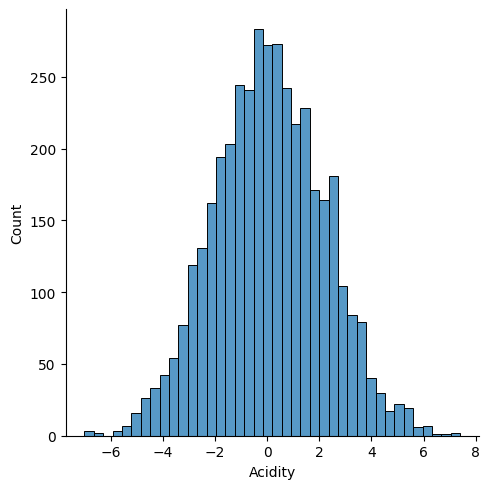

In [8]:
for i in X.keys():
    sns.displot(data=X,x=i)
    plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden"> Model training and comparison
    
<span style="color: #FF360B;">

In [9]:
y_cat=y.map({'bad':0,'good':1})
X_train, X_val, y_train, y_val = train_test_split(X.to_numpy(), y_cat.to_numpy(), test_size=0.2, random_state=42)

In [10]:
def fit_and_evaluate(model, X_train, y_train, X_val, y_val):
    model.fit(X_train, y_train)
    model_pred = model.predict(X_val)
    model_loss = accuracy_score(y_val, model_pred)
    return model_loss

# Define models
models = {
    'XGBClassifier': XGBClassifier(random_state=60),
    'Random Forest': RandomForestClassifier(random_state=60),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    'Gradient Boosted': GradientBoostingClassifier(random_state=60),
    'LGBMClassifier': lgb.LGBMClassifier(),
    'Support Vector Machine': SVC(probability=True, random_state=60),
    'Decision Tree': DecisionTreeClassifier(random_state=60), 
    'AdaBoost': AdaBoostClassifier(random_state=60),
    'MLPClassifier':MLPClassifier(random_state=60)
}

In [11]:
# Train and evaluate each model
loss_scores = {}
for name, model in models.items():
    score = fit_and_evaluate(model, X_train, y_train, X_val, y_val)
    loss_scores[name] = score
    
    
# check the result
loss_scores

[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000636 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250


/opt/conda/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'XGBClassifier': 0.90625,
 'Random Forest': 0.9025,
 'K-Nearest Neighbors': 0.8975,
 'Gradient Boosted': 0.87,
 'LGBMClassifier': 0.90375,
 'Support Vector Machine': 0.9075,
 'Decision Tree': 0.80625,
 'AdaBoost': 0.775,
 'MLPClassifier': 0.935}

In [12]:
# Create a dataframe to hold the results
model_comparison = pd.DataFrame({'model': list(models.keys()), 'Accuracy_loss': list(loss_scores.values())})

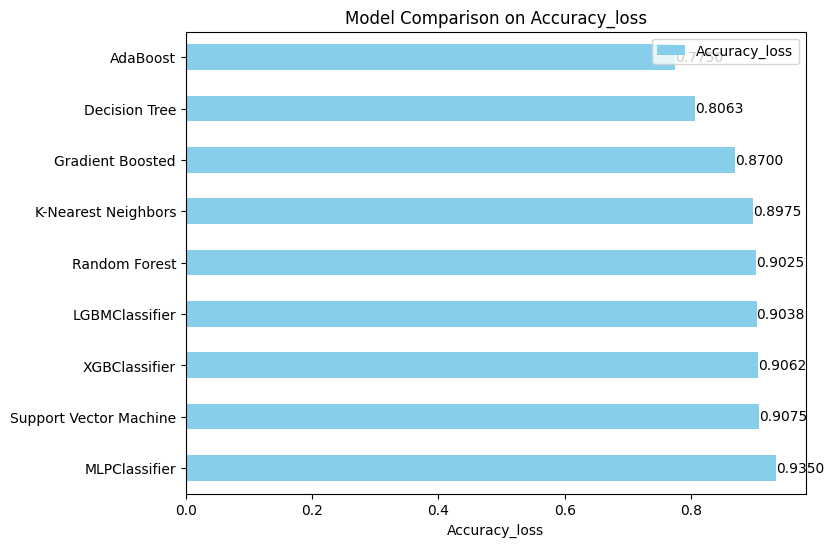

In [13]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
model_comparison.sort_values('Accuracy_loss', ascending=False).plot.barh(x='model', y='Accuracy_loss', ax=ax, color='skyblue')
ax.set_ylabel('')
ax.set_xlabel('Accuracy_loss')
for index, value in enumerate(model_comparison.sort_values('Accuracy_loss', ascending=False)['Accuracy_loss']):
    ax.text(value, index, f'{value:.4f}', ha='left', va='center')
ax.set_title('Model Comparison on Accuracy_loss')
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden"> MLPClassifier
<span style="color: #FF360B;">

In [ ]:
#MLPClassifier
mlp = MLPClassifier(max_iter=1500, random_state=60)

param_list = {"hidden_layer_sizes": [(100, 100), (10,10)],
             "activation": ['tanh', 'relu'],
             'alpha': [0.0001, 0.005],
             "learning_rate": ['adaptive', 'constant']}

model_final = GridSearchCV(estimator=mlp, param_grid=param_list, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)
model_final.best_estimator_

In [ ]:
y_pred_final = model_final.best_estimator_.predict(X_val)
accuracy_final = accuracy_score(y_val, y_pred_final)
print(f"MLPC score after tunning: {accuracy_final:.3f}")

In [15]:
#model_final.feature_importances_
model=MLPClassifier(alpha=0.005, hidden_layer_sizes=(10, 10),
              learning_rate='adaptive', max_iter=1500, random_state=60)
model.fit(X_train, y_train)
model_pred = model.predict(X_val)
model_loss_MLP = accuracy_score(y_val, model_pred)
model_loss_MLP

0.9375

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden"> XGBClassifier
<span style="color: #FF360B;">

In [ ]:
model=XGBClassifier(max_iter=1500, random_state=60)
model.fit(X_train, y_train)
model_pred = model.predict(X_val)
model_loss_xgb = accuracy_score(y_val, model_pred)
print(model_loss_xgb)

In [ ]:
#MLPClassifier
xgb = XGBClassifier(max_iter=1500, random_state=60)

param_list = {"max_depth": [3,5,7,10],
             "subsample": [0.,0.7,1.0],
              'learning_rate':[0.001, 0.1],
             'alpha': [0.0001, 0.005],
             'colsample_bytree':[0.1, 0.5,1.0],
             'min_child_weight': [1,5,10],
             "eta": [0.01,0.1,0.2]}

model_final = GridSearchCV(estimator=xgb, param_grid=param_list, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)
model_final.best_estimator_

In [ ]:
model_final.best_estimator_

In [16]:
model=XGBClassifier(alpha=0.0001,colsample_bytree=1.0, eta=0.1, max_depth=10,learning_rate=0.1,
              max_iter=1500, random_state=60)
model.fit(X_train, y_train)
model_pred = model.predict(X_val)
loss_best_GridSearchCV = accuracy_score(y_val, model_pred)
print(loss_best_GridSearchCV)


/opt/conda/lib/python3.10/site-packages/xgboost/core.py:160: UserWarning: [14:50:05] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_iter" } are not used.

  warnings.warn(smsg, UserWarning)


0.91625


In [ ]:
def objective(trial):
    params = {
        'num_class': 1,  
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'subsample': trial.suggest_uniform('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.1, 1.0),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
        'alpha':trial.suggest_uniform('alpha',0.0001, 0.005),
        'eta':trial.suggest_uniform('eta',0.01,0.2)
    }

    model = XGBClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    loss = accuracy_score(y_val, y_pred)
    return loss

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200, show_progress_bar=True)

# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

In [17]:
best_params={'max_depth': 10,
 'learning_rate': 0.07484934093669075,
 'subsample': 0.7951839622035285,
 'colsample_bytree': 0.9577088777414473,
 'min_child_weight': 2,
 'alpha': 0.003352533253460153,
 'eta': 0.1748895665470069}
model = XGBClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)    
loss_best_optuna = accuracy_score(y_val, y_pred)
print(loss_best_optuna)

0.92


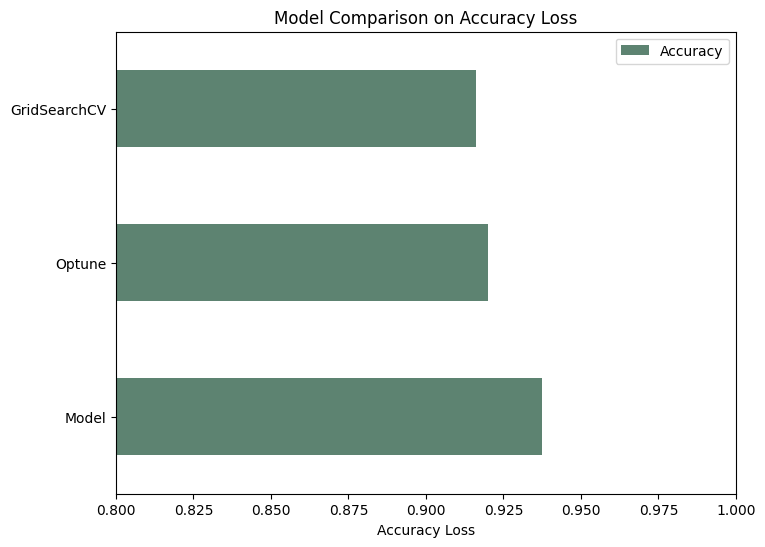

In [18]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
model_comparison = pd.DataFrame({'model': ['Model', 'GridSearchCV','Optune'], 
                                  'Accuracy': [model_loss, loss_best_GridSearchCV,loss_best_optuna]})
model_comparison.sort_values('Accuracy', ascending=False).plot.barh(x='model', y='Accuracy', ax=ax,  color='#5D8371')
ax.set_ylabel('')
ax.set_xlabel('Accuracy Loss')
ax.set_title('Model Comparison on Accuracy Loss')
ax.set_xlim(0.8,1.0)
plt.show()

In [ ]:
importances=pd.Series(model.feature_importances_, index=X.columns) 
importances_sorted = importances.sort_values()
importances_sorted.plot(kind='barh', figsize=(12,4), color='#5D8371')
plt.title("Model XGBClassifier Use Optuna")

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden"> LGBMClassifier
<span style="color: #FF360B;">

In [21]:
#LGBM
# Train a GradientBoostingClassifier
model =LGBMClassifier(random_state=60)
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
loss_LGBMClassifier = accuracy_score(y_val, y_pred)
print(f'Accuracy: {loss_LGBMClassifier}')

[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000582 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1785
[LightGBM] [Info] Number of data points in the train set: 3200, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.501563 -> initscore=0.006250
[LightGBM] [Info] Start training from score 0.006250
Accuracy: 0.90375


In [ ]:
def objective(trial):
    params = {
        'objective': 'binary',
        'metric': 'accuracy',  # Use 'multi_logloss' for evaluation
        'boosting_type': 'gbdt',
        'num_class': 1,  # Replace with the actual number of classes
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
    }

    model = lgb.LGBMClassifier(**params)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)    
    loss = accuracy_score(y_val, y_pred)
    return loss

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=200,show_progress_bar=True)

# Get the best parameters
best_params = study.best_params
print(f"Best Params: {best_params}")

In [19]:
best_params={'num_leaves': 60,
 'learning_rate': 0.09110296934751104,
 'feature_fraction': 0.9625032086171286,
 'bagging_fraction': 0.6644252429208107,
 'bagging_freq': 1,
 'min_child_samples': 12}
model = lgb.LGBMClassifier(**best_params)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)    
best_loss_LGBMClassifier = accuracy_score(y_val, y_pred)
print(best_loss_LGBMClassifier)

[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000471 seconds.
You can s

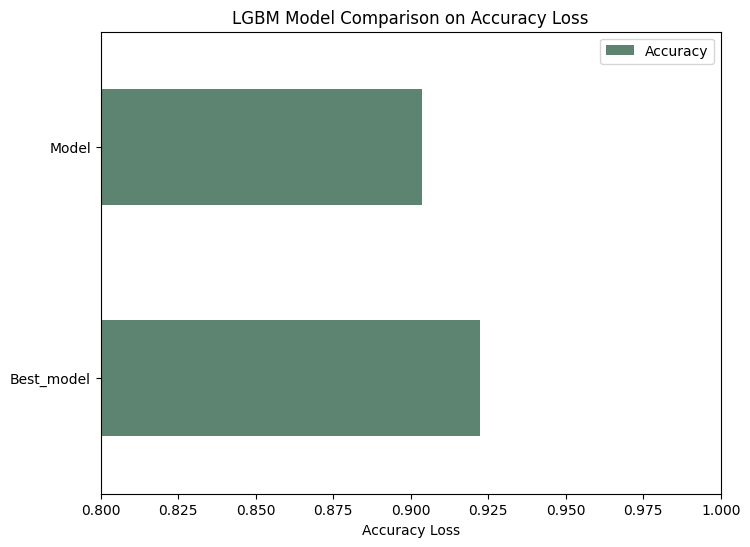

In [22]:
# Plot the results
fig, ax = plt.subplots(figsize=(8, 6))
model_comparison = pd.DataFrame({'model': ['Model', 'Best_model'], 
                                  'Accuracy': [loss_LGBMClassifier,best_loss_LGBMClassifier]})
model_comparison.sort_values('Accuracy', ascending=False).plot.barh(x='model', y='Accuracy', ax=ax,  color='#5D8371')
ax.set_ylabel('')
ax.set_xlabel('Accuracy Loss')
ax.set_title('LGBM Model Comparison on Accuracy Loss')
ax.set_xlim(0.8,1.0)
plt.show()

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden"> Ensemble Learning: VoteClassifier
<span style="color: #FF360B;">

In [24]:
best_params={'num_leaves': 60,
 'learning_rate': 0.09110296934751104,
 'feature_fraction': 0.9625032086171286,
 'bagging_fraction': 0.6644252429208107,
 'bagging_freq': 1,
 'min_child_samples': 12}
lgb_best = lgb.LGBMClassifier(**best_params)

best_params={'max_depth': 10,
 'learning_rate': 0.07484934093669075,
 'subsample': 0.7951839622035285,
 'colsample_bytree': 0.9577088777414473,
 'min_child_weight': 2,
 'alpha': 0.003352533253460153,
 'eta': 0.1748895665470069}
xgb_best = XGBClassifier(**best_params)
mlp_best=MLPClassifier(alpha=0.005, hidden_layer_sizes=(10, 10),
              learning_rate='adaptive', max_iter=1500, random_state=60)

In [27]:
# List of weight combinations 
weight_combinations = [
    (1, 1, 2),
    (2, 1, 3),  
    (2, 1, 2),  
    (1, 1, 4),  
]
accur=[]

for weights in weight_combinations:
    # Create a voting classifier with the current set of weights
    vote_classifier = VotingClassifier(
        estimators=[
            ('LGBMClassifier', lgb_best),
            ('XGBClassifier', xgb_best),
            ('MLPClassifier', mlp_best)
        ],
        voting='soft',  # Use 'hard' for majority voting or 'soft' for weighted voting based on class probabilities
        weights=weights
    )

    # Fit the voting classifier on the training data
    vote_classifier.fit(X_train, y_train)

    # Make predictions on the validation data
    y_pred = vote_classifier.predict(X_val)

    # Evaluate the log loss of the ensemble model
    accuracy = accuracy_score(y_val, y_pred)
    print(f'Weights: {weights}, Ensemble Model Accuracy: {accuracy:.8f}')
    accur.append(accuracy)
accur

[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can s

[0.94125, 0.94, 0.93625, 0.93875]

In [29]:
# Create a voting classifier
vote_classifier = VotingClassifier(
        estimators=[
            ('LGBMClassifier', lgb_best),
            ('XGBClassifier', xgb_best),
            ('MLPClassifier', mlp_best)
        ],
        voting='soft',  # Use 'hard' for majority voting or 'soft' for weighted voting based on class probabilities
        weights=[1,1,2]
    )

# Fit the voting classifier on the training data
vote_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = vote_classifier.predict(X_val)

# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_val, y_pred)
print(f'Ensemble Model Accuracy: {accuracy:.8f}')

[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Info] Number of positive: 1605, number of negative: 1595
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000512 seconds.
You can s

In [30]:
y_pred = vote_classifier.predict(X_train)
accuracy_score(y_train, y_pred)

[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


0.9834375

[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


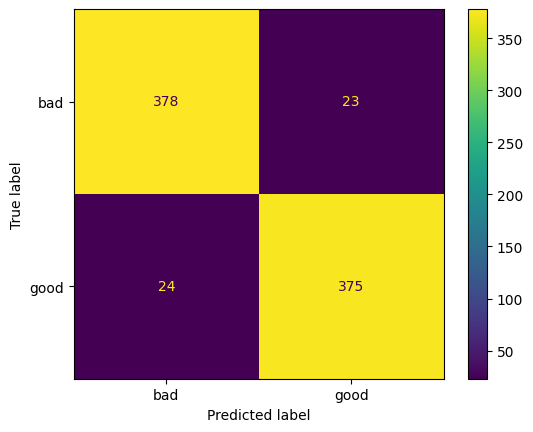

In [51]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(vote_classifier,X_val, y_val,display_labels=("bad", "good"))

# <div style="padding:20px;color:white;margin:0;font-size:30px;font-family:Roboto;text-align:left;display:fill;border-radius:5px;background-color:#FF8383;overflow:hidden"> Neural Network Model
<span style="color: #FF360B;">

In [44]:
from tensorflow.keras import Sequential, layers , optimizers , callbacks, models

model=Sequential([
    layers.Dense(256,input_shape=[7], activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(32, activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

model_checkpoint_callback = callbacks.ModelCheckpoint(
    filepath='./best_NN_model.h5',
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,validation_data=(X_val, y_val), epochs=100,verbose=1,callbacks=[model_checkpoint_callback])

Epoch 1/100
100/100 [==============================] - 2s 6ms/step - loss: 0.3940 - accuracy: 0.8138 - val_loss: 0.3268 - val_accuracy: 0.8600
Epoch 2/100
 62/100 [=================>............] - ETA: 0s - loss: 0.2857 - accuracy: 0.8710

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


100/100 [==============================] - 0s 4ms/step - loss: 0.2885 - accuracy: 0.8712 - val_loss: 0.2626 - val_accuracy: 0.9013
Epoch 3/100
100/100 [==============================] - 0s 4ms/step - loss: 0.2499 - accuracy: 0.8950 - val_loss: 0.2623 - val_accuracy: 0.9050
Epoch 4/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2306 - accuracy: 0.9022 - val_loss: 0.2184 - val_accuracy: 0.9225
Epoch 5/100
100/100 [==============================] - 0s 3ms/step - loss: 0.2047 - accuracy: 0.9134 - val_loss: 0.2238 - val_accuracy: 0.9075
Epoch 6/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1941 - accuracy: 0.9203 - val_loss: 0.2171 - val_accuracy: 0.9250
Epoch 7/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1762 - accuracy: 0.9319 - val_loss: 0.2055 - val_accuracy: 0.9162
Epoch 8/100
100/100 [==============================] - 0s 4ms/step - loss: 0.1652 - accuracy: 0.9388 - val_loss: 0.1879 - val_accuracy: 0.9337
Epoch 9/100

In [45]:
model=models.load_model("/kaggle/working/best_NN_model.h5")
y_pred = model.predict(X_val)

y_pred_mod=(y_pred>=0.5)*1
# Evaluate the accuracy of the ensemble model
accuracy = accuracy_score(y_val, y_pred_mod)
print(f'Ensemble Model Accuracy: {accuracy:.8f}')

25/25 [==============================] - 0s 1ms/step
Ensemble Model Accuracy: 0.95375000


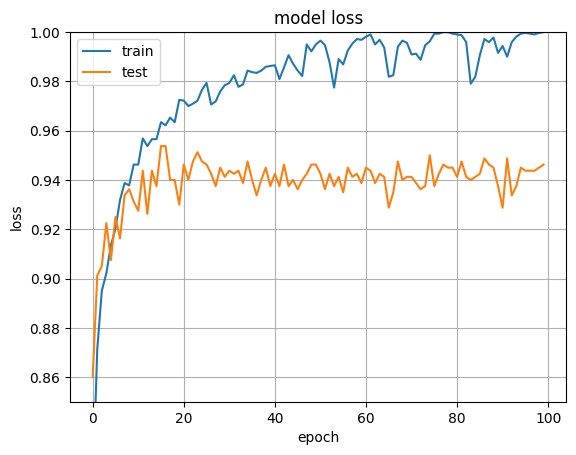

In [46]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.grid()
plt.ylim(0.85,1)
plt.show()

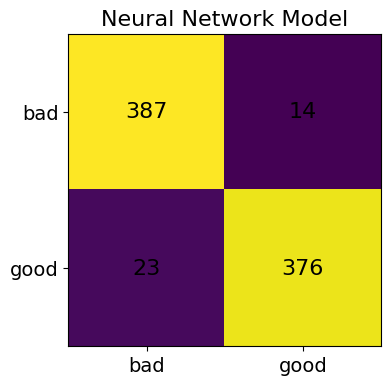

In [64]:
from sklearn.metrics import confusion_matrix

r = confusion_matrix(y_val, y_pred_mod)
fig, ax = plt.subplots(figsize=(4,4))
im = ax.imshow(r)

k=["bad","good"]

ax.set_xticks(np.arange(len(k)), labels=k,fontsize=14)
ax.set_yticks(np.arange(len(k)), labels=k,fontsize=14)

for i in range(len(k)):
    for j in range(len(k)):
        text = ax.text(j, i, r[i,j],ha="center", va="center", color="k",fontsize=16)

fig.tight_layout()
plt.title("Neural Network Model",fontsize=16)
plt.show()

[LightGBM] [Warning] feature_fraction is set=0.9625032086171286, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9625032086171286
[LightGBM] [Warning] bagging_fraction is set=0.6644252429208107, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6644252429208107
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


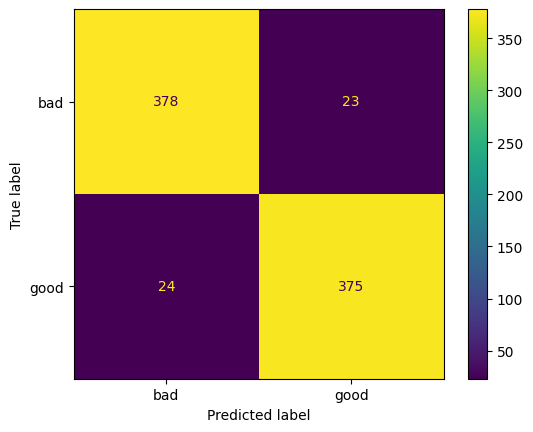

In [60]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(vote_classifier,X_val, y_val,display_labels=("bad", "good"))